In [ ]:
#Data Analysis - Avacado prices

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import files
df = pd.read_csv('Retail Units.csv')

In [27]:
# import data
volume = pd.read_csv('avocado.csv')

In [26]:
volume.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Text(0.5, 1.0, 'Average Price')

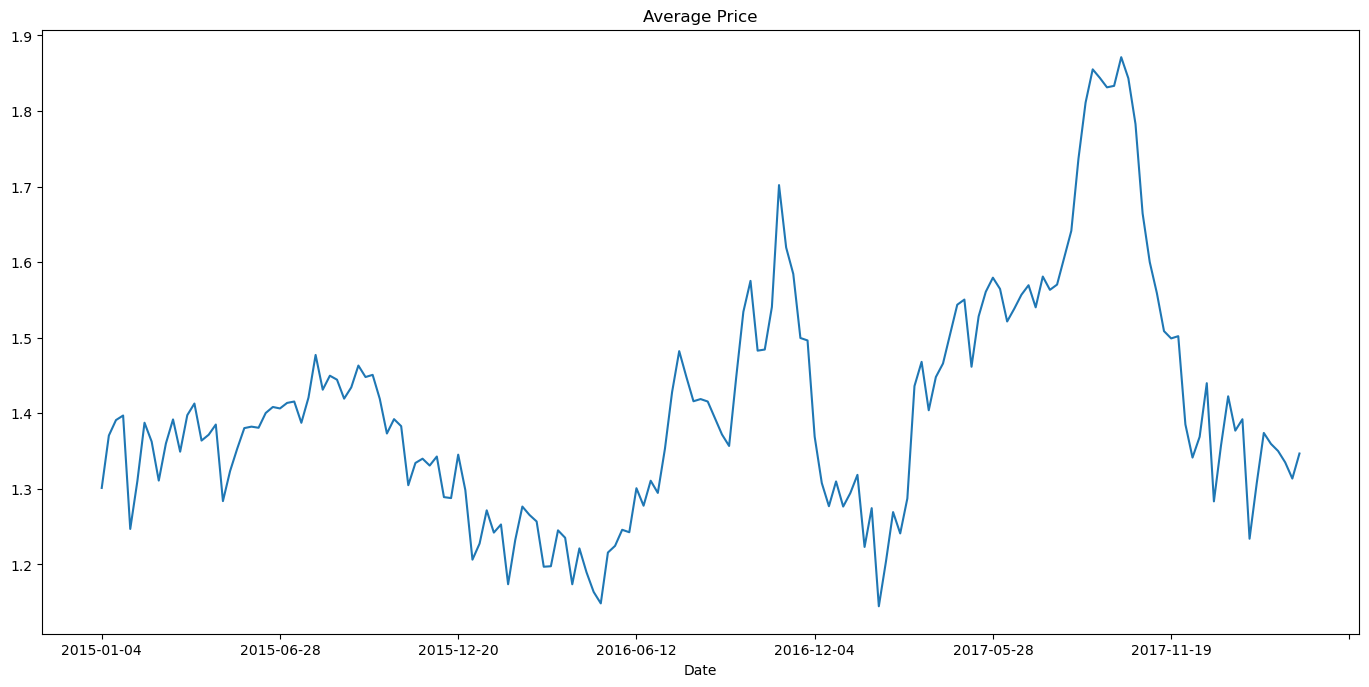

In [68]:
import matplotlib.pyplot as plt

byDate=volume.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

#this is the average price of avacados at different times

<AxesSubplot:>

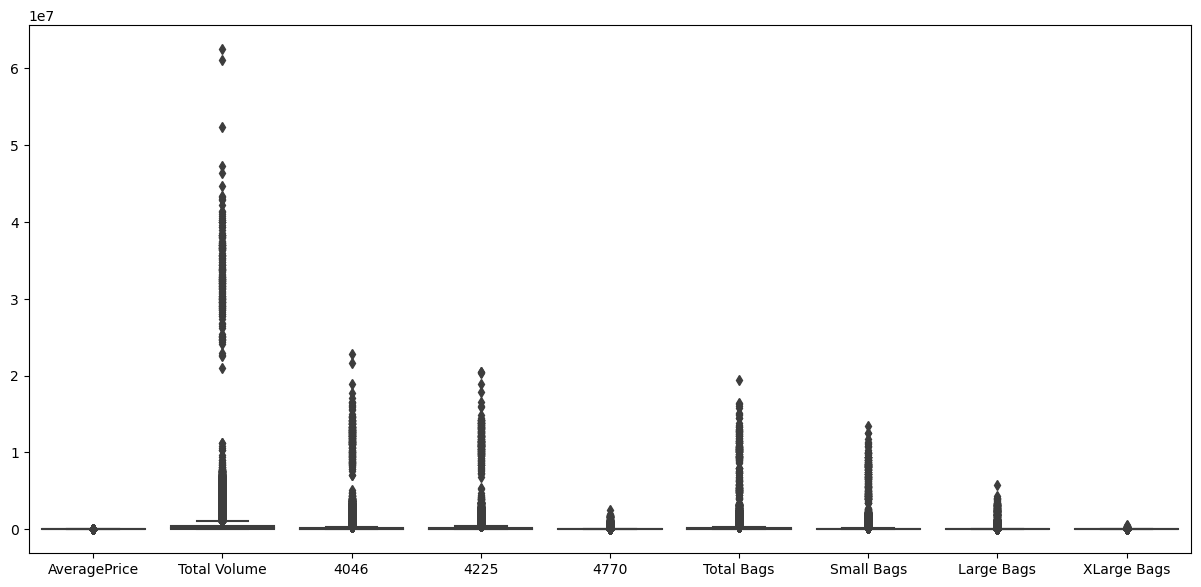

In [70]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = volume[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [71]:
# seems to have many outlier, by removing the ouliers 

import numpy as np
from numpy import percentile

columns = volume.columns
for x in columns:
    if isinstance(volume[x][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(volume[x], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        volume[x] = volume[x].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

<AxesSubplot:>

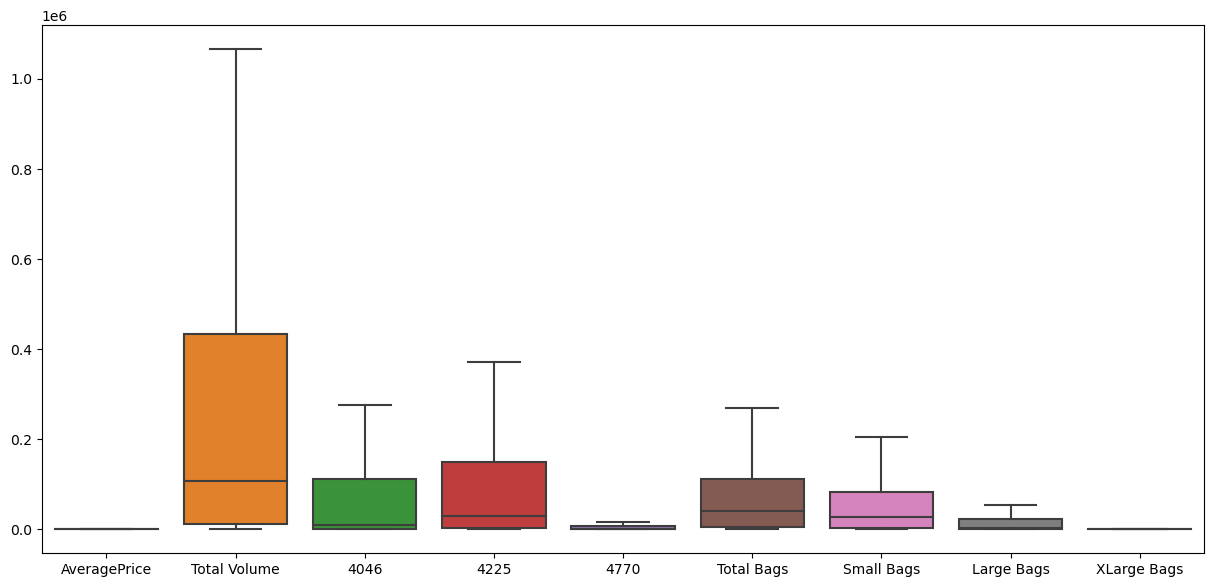

In [72]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = volume[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [ ]:
#statistical analysis


In [79]:
#liner regression
x = volume.iloc[:, :-1].values
y = volume.iloc[:, 1].values

#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)

#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
regressorObject = LinearRegression()
regressorObject.fit(x_train,y_train)

#predict the test set
y_pred_test_data=regressorObject.predict(x_test)


# Visualising the Training set results in a scatter plot
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressorObject.predict(x_train), color = 'blue')
plt.title('Linear Regression on Avg Price')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


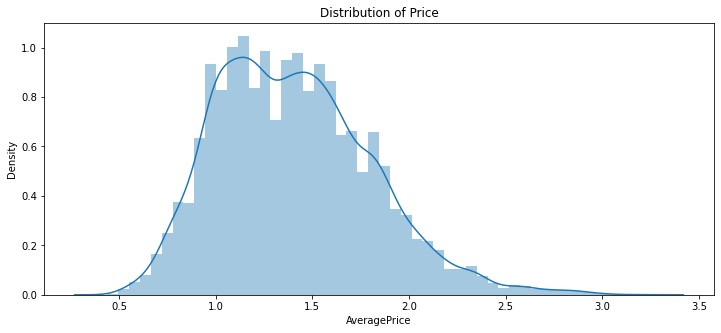

In [66]:
#additional analysis
plt.figure(figsize=(12,5))
plt.title("Distribution of Price")
ax = sns.distplot(volume["AveragePrice"])

In [ ]:
#the graph shows how the price is disributed compared to the sample size

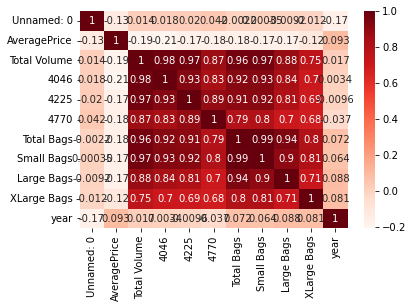

In [34]:
#determine any correlation between the volume/price
cor=volume.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.Reds)
plt.show()


In [ ]:
#Based on the graph above none of them are highly correlate with AveragePrice.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

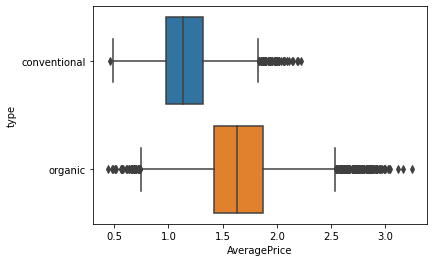

In [52]:
#average price of organic vs. conventional avocados
sns.boxplot(y="type", x="AveragePrice", data=volume)